In [62]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [63]:
df_GM = df[df['job_country'] == 'Germany'].copy()

In [64]:
df_GM

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,['sap'],{'analyst_tools': ['sap']}
64,Senior Data Analyst,Senior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-25 13:13:39,True,False,Germany,None,NaN,NaN,Stepstone GmbH,None,None
78,Senior Data Scientist,Senior Data Expert,"Berlin, Germany",via Jobs Trabajo.org,Full-time,False,Germany,2023-10-27 13:13:25,False,False,Germany,None,NaN,NaN,SIXT Germany,"['sql', 'excel', 'looker', 'sap']","{'analyst_tools': ['excel', 'looker', 'sap'], ..."
104,Software Engineer,Senior Software Engineer - Metadata,"Berlin, Germany",via Snowflake Careers,Full-time,False,Germany,2023-10-27 13:13:54,False,False,Germany,None,NaN,NaN,Snowflake,"['c++', 'java', 'snowflake']","{'cloud': ['snowflake'], 'programming': ['c++'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785728,Senior Data Scientist,"Senior Data Scientist, Operations Research",Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Wolt Oy,"['python', 'sql']","{'programming': ['python', 'sql']}"
785729,Data Engineer,Data Engineer Marketing Intelligence,Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,IU Internationale Hochschule,None,None
785732,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Heidelberg Materials,"['python', 'c#', 'java', 'scala', 'sql', 'post...","{'cloud': ['azure', 'databricks'], 'databases'..."
785735,Senior Data Engineer,Senior Data Engineer,"Berlin, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:19:07,False,False,Germany,None,NaN,NaN,Pure App,"['sql', 'python', 'bigquery', 'aws', 'airflow'...","{'cloud': ['bigquery', 'aws'], 'libraries': ['..."


In [65]:
df_GM['job_posted_month'] = df_GM['job_posted_date'].dt.strftime('%B')

In [66]:
df_GM_pivot = df_GM.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [67]:
df_GM_pivot.reset_index(inplace=True)
df_GM_pivot['month_no'] = pd.to_datetime(df_GM_pivot['job_posted_month'], format=('%B')).dt.month
df_GM_pivot.sort_values('month_no', inplace=True)
df_GM_pivot.set_index('job_posted_month', inplace=True)
df_GM_pivot.drop(columns='month_no', inplace=True)

In [68]:
df_GM_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,11,596,622,759,39,128,239,205,52
February,49,11,593,571,611,35,131,199,171,60
March,43,3,582,511,529,18,86,199,157,42
April,47,13,454,432,520,17,93,190,146,20
May,45,7,430,364,351,16,81,123,111,29
June,31,7,558,434,430,22,92,137,138,30
July,46,7,545,474,438,25,105,143,125,50
August,28,9,489,399,407,30,86,145,141,48
September,106,24,656,668,583,41,126,178,137,66


<Axes: xlabel='job_posted_month'>

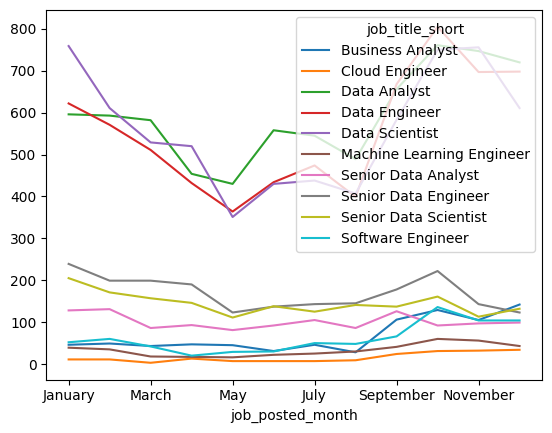

In [69]:
df_GM_pivot.plot(kind='line')

In [70]:
df_GM_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,11,596,622,759,39,128,239,205,52
February,49,11,593,571,611,35,131,199,171,60
March,43,3,582,511,529,18,86,199,157,42
April,47,13,454,432,520,17,93,190,146,20
May,45,7,430,364,351,16,81,123,111,29
June,31,7,558,434,430,22,92,137,138,30
July,46,7,545,474,438,25,105,143,125,50
August,28,9,489,399,407,30,86,145,141,48
September,106,24,656,668,583,41,126,178,137,66


In [71]:
top_3 = df_GM['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()

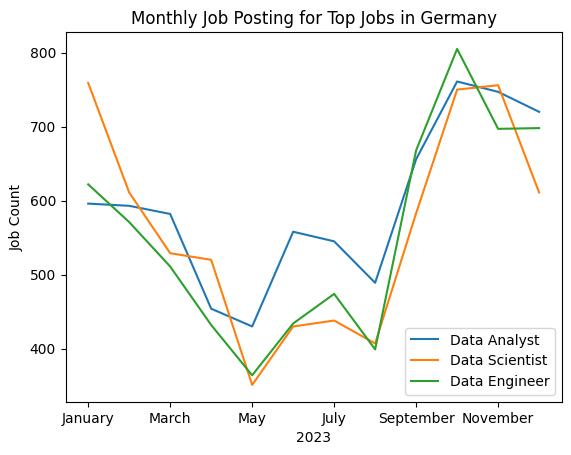

In [73]:
df_GM_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Posting for Top Jobs in Germany')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()